CNN 을 위한 Layer를 가지고옴 
Conv2D , MaxPooling2D , Flatten , Dropout

In [ ]:
import numpy as np
from keras.models import Sequential , load_model
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint
from PIL import Image , ImageFilter
import PIL.ImageOps

레이어 구성 : [컨볼루션 3X3 32개 필터  x 2번 - 맥스풀링] 2회 - 마지막에는 항상 Flatten 을 사용해 1차원 값으로 변형 하여 신경망으로 연결

In [29]:
def makeModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3), data_format=None,input_shape = (28,28,1), activation="relu"))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss="mean_squared_error",
                  optimizer='adam')

    print(model.summary())
    return model

Keras datasets 에서 Mnist 데이터를불러온 다음 
1. 0~1 사이의 값으면 변형해서 사용 
2. 타겟(실제 값, 레이블) 은 원핫 인코딩을 사용해 10 개의 백터로 만들어 줍니다. 

In [37]:
if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')

    x_train = x_train/255
    x_test = x_test/255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)   

In [38]:
    makeModel()
    
    '''
    checkpoint = ModelCheckpoint("MnistCNN_CP.hdf5")
    checkList = [checkpoint]

    model = makeModel()

    model.save("MnistCNNst.h5")
    model.fit(x_train,y_train,epochs=3,callbacks = checkList,verbose=1)
    model.save_weights("MnistCNN_FinalW.hdf5")
    '''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
__________

'\ncheckpoint = ModelCheckpoint("MnistCNN_CP.hdf5")\ncheckList = [checkpoint]\n\nmodel = makeModel()\n\nmodel.save("MnistCNNst.h5")\nmodel.fit(x_train,y_train,epochs=3,callbacks = checkList,verbose=1)\nmodel.save_weights("MnistCNN_FinalW.hdf5")\n'

In [39]:
    import os    
    os.chdir("D://WS//Py")
    model = load_model("MnistCNNst.h5")
    model.load_weights("MnistCNN_CP.hdf5")  

In [40]:
    input = x_test[1].reshape(1,28,28,1)
    print("Predict is : ",model.predict_classes(input).round())
    

Predict is :  [2]


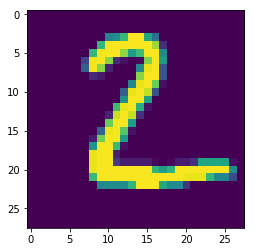

In [41]:
    import matplotlib.pyplot as plt
    img = input.reshape(28,28)
    plt.imshow(img)
    plt.show()